# Introduction to daru (Data Analysis in RUby)

## Sameer Deshmukh

### Deccan Ruby Conf 2015, Pune, India.

In [1]:
require 'daru'
require 'distribution'
require 'gnuplotrb'

"if(window['d3'] === undefined ||\n   window['Nyaplot'] === undefined){\n    var path = {\"d3\":\"http://d3js.org/d3.v3.min\",\"downloadable\":\"http://cdn.rawgit.com/domitry/d3-downloadable/master/d3-downloadable\"};\n\n\n\n    var shim = {\"d3\":{\"exports\":\"d3\"},\"downloadable\":{\"exports\":\"downloadable\"}};\n\n    require.config({paths: path, shim:shim});\n\n\nrequire(['d3'], function(d3){window['d3']=d3;console.log('finished loading d3');require(['downloadable'], function(downloadable){window['downloadable']=downloadable;console.log('finished loading downloadable');\n\n\tvar script = d3.select(\"head\")\n\t    .append(\"script\")\n\t    .attr(\"src\", \"http://cdn.rawgit.com/domitry/Nyaplotjs/master/release/nyaplot.js\")\n\t    .attr(\"async\", true);\n\n\tscript[0][0].onload = script[0][0].onreadystatechange = function(){\n\n\n\t    var event = document.createEvent(\"HTMLEvents\");\n\t    event.initEvent(\"load_nyaplot\",false,false);\n\t    window.dispatchEvent(event);\n\t

true

### Creating a Daru::Vector

**Vectors are indexed by passing data using the `index` option, and named with `name`**

In [2]:
vector = Daru::Vector.new(
  [20,40,25,50,45,12], index: ['cherry', 'apple', 'barley', 'wheat', 'rice', 'sugar'], 
  name: "Prices of stuff.")

#<Daru::Vector:89452810 @name = Prices of stuff. @size = 6 >
                 Prices of stuff.
          cherry               20
           apple               40
          barley               25
           wheat               50
            rice               45
           sugar               12

### Retreive a single value

**Specify the index you want to retrieve in the `#[]` operator**

In [3]:
vector['rice']

45

### Retreive multiple values

**Multiple values can be retreived at the same time as another Daru::Vector by separating them with commas.**

In [4]:
vector['rice', 'wheat', 'sugar']

#<Daru::Vector:89680340 @name = Prices of stuff. @size = 3 >
                 Prices of stuff.
            rice               45
           wheat               50
           sugar               12

### Retreive a slice with a Range

**Specifying a range of indexes will retrieve a slice of the Daru::Vector**

In [5]:
vector['barley'..'sugar']

#<Daru::Vector:78312100 @name = Prices of stuff. @size = 4 >
                 Prices of stuff.
          barley               25
           wheat               50
            rice               45
           sugar               12

### Assign a value

**Assign a value by specifying the index directly to the #[]= operator**

In [6]:
vector['barley'] = 1500
vector

#<Daru::Vector:89452810 @name = Prices of stuff. @size = 6 >
                 Prices of stuff.
          cherry               20
           apple               40
          barley             1500
           wheat               50
            rice               45
           sugar               12

### Creating a Daru::DataFrame

**The `:index` option is used for specifying the row index of the DataFrame and the `:order` option determines the order in which they will be stored.**

**Note that this is only one way of creating a DataFrame. There are around 8 different ways you can do so, depending on your use case.**

In [7]:
df = Daru::DataFrame.new({
  'col0' => [1,2,3,4,5,6],
  'col2' => ['a','b','c','d','e','f'],
  'col1' => [11,22,33,44,55,66]
  }, 
  index: ['one', 'two', 'three', 'four', 'five', 'six'], 
  order: ['col0', 'col1', 'col2']
)

,col0,col1,col2
one,1,11,a
two,2,22,b
three,3,33,c
four,4,44,d
five,5,55,e
six,6,66,f


### Accessing a Column

**A DataFrame column can be accessed using the DataFrame#[] operator.**

**Note that it returns a Daru::Vector**

In [8]:
df['col1']

#<Daru::Vector:90053990 @name = col1 @size = 6 >
       col1
  one    11
  two    22
three    33
 four    44
 five    55
  six    66

### Accessing multiple Columns

**Multiple columns can be accessed by separating them with a comma. The result is another DataFrame.**

In [9]:
df['col2', 'col0']

,col2,col0
one,a,1
two,b,2
three,c,3
four,d,4
five,e,5
six,f,6


### Accessing a Range of Columns

**A slice of the DataFrame by columns can be obtained by specifying a Range in #[]**

In [10]:
df['col1'..'col2']

,col1,col2
one,11,a
two,22,b
three,33,c
four,44,d
five,55,e
six,66,f


### Assigning a Column

**You can assign a Daru::Vector to a column and the indexes of the Vector will be automatically matched to that of the DataFrame.**

In [11]:
df['col1'] = Daru::Vector.new(['this', 'is', 'some','new','data','here'], 
  index: ['one', 'three','two','six','four', 'five'])
df

,col0,col1,col2
one,1,this,a
two,2,some,b
three,3,is,c
four,4,data,d
five,5,here,e
six,6,new,f


### Accessing a Row

**A single row can be accessed using the `#row[]` function.**

In [12]:
df.row['four']

#<Daru::Vector:90685570 @name = four @size = 3 >
     four
col0    4
col1 data
col2    d

### Accessing a Range of Rows

**Specifying a Range of Row indexes in `#row[]` will select a DataFrame with those rows**

In [13]:
df.row['three'..'five']

,col0,col1,col2
three,3,is,c
four,4,data,d
five,5,here,e


### Assigning a Row

**You can also assign a Row with Daru::Vector. Notice that indexes are mathced according to the order of the DataFrame.**

In [14]:
df.row['five'] = [666,555,333]

[666, 555, 333]

### Statistics on Vector with missing data

**A host of static and rolling statistics methods are provided on Daru::Vector.**

**Note that missing data (very common in most real world scenarios) is gracefully handled**

In [15]:
vector = Daru::Vector.new([1,3,5,nil,2,53,nil])
vector.mean

12.8

### Statistics on DataFrame

**DataFrame statistics will basically apply the concerned method on all numerical columns of the DataFrame.**

In [16]:
df.mean

#<Daru::Vector:91170160 @name = mean @size = 1 >
                                 mean
              col0 113.66666666666667

**Useful statistics about the vectors in a DataFrame can be observed with `#describe`**

In [17]:
df.describe

,col0
count,6
mean,113.66666666666667
std,270.5924364550249
min,1
max,666


## Time Series Support

**Daru offers a robust time series manipulation API for indexing data based on timestamps. This makes daru a viable tool for analyzing financial data (or any data that changes with time)**

### The DateTimeIndex

**The DateTimeIndex is a special index for indexing data based on timestamps.**

**A date index range can be created using the DateTimeIndex.date_range function. The `:freq` option decides the time frequency between each timestamp in the date index.**

In [18]:
index = Daru::DateTimeIndex.date_range(:start => '2012', :periods => 1000, :freq => '3D')

#<DateTimeIndex:91450160 offset=3D periods=1000 data=[2012-01-01T00:00:00+00:00...2020-03-16T00:00:00+00:00]>

**A Daru::Vector can be created by simply passing the newly created index object into the `:index` argument.**

In [19]:
timeseries = Daru::Vector.new(1000.times.map {rand}, index: index)

#<Daru::Vector:91598600 @name = nil @size = 1000 >
                                      nil
2012-01-01T00:00:00+  0.06432760231439416
2012-01-04T00:00:00+  0.21570630053598872
2012-01-07T00:00:00+   0.5101235668081691
2012-01-10T00:00:00+    0.404505665174268
2012-01-13T00:00:00+   0.7547853067373365
2012-01-16T00:00:00+  0.22975839435256395
2012-01-19T00:00:00+   0.8555217457567347
2012-01-22T00:00:00+   0.5213372476755825
2012-01-25T00:00:00+   0.9845856112314653
2012-01-28T00:00:00+   0.5877276034836173
2012-01-31T00:00:00+   0.3476004201665428
2012-02-03T00:00:00+   0.6933956470425853
2012-02-06T00:00:00+   0.8820849847497902
2012-02-09T00:00:00+  0.16274513982900884
2012-02-12T00:00:00+   0.3445045913600904
2012-02-15T00:00:00+   0.5264949818224421
2012-02-18T00:00:00+   0.7314171300426558
                 ...                  ...

### Accessing data by partial timestamps

**When a Vector or DataFrame is indexed by a DateTimeIndex, it allows you to partially specify the date to retreive all the data that belongs to that date.**

**For example, to access all the data belonging to the year 2012.**

In [20]:
timeseries['2012']

#<Daru::Vector:91857140 @name = nil @size = 122 >
                                      nil
2012-01-01T00:00:00+  0.06432760231439416
2012-01-04T00:00:00+  0.21570630053598872
2012-01-07T00:00:00+   0.5101235668081691
2012-01-10T00:00:00+    0.404505665174268
2012-01-13T00:00:00+   0.7547853067373365
2012-01-16T00:00:00+  0.22975839435256395
2012-01-19T00:00:00+   0.8555217457567347
2012-01-22T00:00:00+   0.5213372476755825
2012-01-25T00:00:00+   0.9845856112314653
2012-01-28T00:00:00+   0.5877276034836173
2012-01-31T00:00:00+   0.3476004201665428
2012-02-03T00:00:00+   0.6933956470425853
2012-02-06T00:00:00+   0.8820849847497902
2012-02-09T00:00:00+  0.16274513982900884
2012-02-12T00:00:00+   0.3445045913600904
2012-02-15T00:00:00+   0.5264949818224421
2012-02-18T00:00:00+   0.7314171300426558
                 ...                  ...

**Or to access data whose time stamp is March 2012...**

In [21]:
timeseries['2012-3']

#<Daru::Vector:92006600 @name = nil @size = 11 >
                                      nil
2012-03-01T00:00:00+  0.20394638540933607
2012-03-04T00:00:00+   0.7338861847638259
2012-03-07T00:00:00+   0.7176222732232334
2012-03-10T00:00:00+  0.20373371452624167
2012-03-13T00:00:00+  0.13984099805443062
2012-03-16T00:00:00+ 0.024286944421306855
2012-03-19T00:00:00+   0.7549682932649356
2012-03-22T00:00:00+    0.649031311654988
2012-03-25T00:00:00+   0.6008138470038575
2012-03-28T00:00:00+  0.07162815663653599
2012-03-31T00:00:00+  0.17952283586638107

**Specifying the date precisely will return the exact data point (You can also pass a ruby DateTime object for precisely obtaining data).**

In [22]:
timeseries['2012-3-10']

0.20373371452624167

**Say you have per second data about the price of a commodity and want to access the prices for the minute on 23rd of March 2012 at 12:42 pm**

In [23]:
index      = Daru::DateTimeIndex.date_range(
  :start => '2012-3-23 11:00', :periods => 20000, :freq => 'S')

seconds_ts = Daru::Vector.new(20000.times.map { rand(50) }, index: index)
seconds_ts['2012-3-23 12:42']

#<Daru::Vector:89400190 @name = nil @size = 60 >
                                      nil
2012-03-23T12:42:00+                    6
2012-03-23T12:42:01+                   41
2012-03-23T12:42:02+                   35
2012-03-23T12:42:03+                   48
2012-03-23T12:42:04+                    4
2012-03-23T12:42:05+                    8
2012-03-23T12:42:06+                   14
2012-03-23T12:42:07+                   37
2012-03-23T12:42:08+                   12
2012-03-23T12:42:09+                   45
2012-03-23T12:42:10+                   11
2012-03-23T12:42:11+                   14
2012-03-23T12:42:12+                   42
2012-03-23T12:42:13+                   26
2012-03-23T12:42:14+                   49
2012-03-23T12:42:15+                   27
2012-03-23T12:42:16+                   22
                 ...                  ...

## Visualization

### Simple Visualization with interactive graphs

**Plotting a simple scatter plot from a DataFrame. Nyaplot integration provides interactivity.**

**DataFrame denoting Ice Cream sales of a particular food chain in a city according to the maximum recorded temperature in that city. It also lists the staff strength present in each city.**

In [24]:
df = Daru::DataFrame.new({
  :temperature => [30.4, 23.5, 44.5, 20.3, 34, 24, 31.45, 28.34, 37, 24],
  :sales       => [350, 150, 500, 200, 480, 250, 330, 400, 420, 560],
  :city        => ['Pune', 'Delhi']*5,
  :staff       => [15,20]*5
})
df

,city,sales,staff,temperature
0,Pune,350,15,30.4
1,Delhi,150,20,23.5
2,Pune,500,15,44.5
3,Delhi,200,20,20.3
4,Pune,480,15,34
5,Delhi,250,20,24
6,Pune,330,15,31.45
7,Delhi,400,20,28.34
8,Pune,420,15,37
9,Delhi,560,20,24


**The plot below is between Temperature in the city and the sales of ice cream.**

In [25]:
df.plot(type: :scatter, x: :temperature, y: :sales) do |plot, diagram|
  plot.x_label "Temperature"
  plot.y_label "Sales"
  plot.yrange [100, 600]
  plot.xrange [15, 50]
  diagram.tooltip_contents([:city, :staff])
  # Set the color scheme for this diagram.
  diagram.color(Nyaplot::Colors.qual) 
  # Change color of each point WRT to the city that it belongs to.
  diagram.fill_by(:city)
  # Shape each point WRT to the city that it belongs to.
  diagram.shape_by(:city) 
end

#<Nyaplot::Frame:0xad83880 @properties={:panes=>[#<Nyaplot::Plot:0xade61c4 @properties={:diagrams=>[#<Nyaplot::Diagram:0xad9c6dc @properties={:type=>:scatter, :options=>{:x=>:temperature, :y=>:sales, :tooltip_contents=>[:city, :staff], :color=>#<Nyaplot::Color:0xad83948 @source=["rgb(179,226,205)", "rgb(253,205,172)", "rgb(203,213,232)", "rgb(244,202,228)", "rgb(230,245,201)", "rgb(255,242,174)", "rgb(241,226,204)", "rgb(204,204,204)"]>, :fill_by=>:city, :shape_by=>:city}, :data=>"a907295f-4985-42de-a772-d7fb62ae05d1"}, @xrange=[20.3, 44.5], @yrange=[150, 560]>], :options=>{:x_label=>"Temperature", :y_label=>"Sales", :yrange=>[100, 600], :xrange=>[15, 50], :zoom=>true, :width=>700}}>], :data=>{"a907295f-4985-42de-a772-d7fb62ae05d1"=>#<Nyaplot::DataFrame:0xad9cefc @name="a907295f-4985-42de-a772-d7fb62ae05d1", @rows=[{:city=>"Pune", :sales=>350, :staff=>15, :temperature=>30.4}, {:city=>"Delhi", :sales=>150, :staff=>20, :temperature=>23.5}, {:city=>"Pune", :sales=>500, :staff=>15, :temperature=>44.5}, {:city=>"Delhi", :sales=>200, :staff=>20, :temperature=>20.3}, {:city=>"Pune", :sales=>480, :staff=>15, :temperature=>34}, {:city=>"Delhi", :sales=>250, :staff=>20, :temperature=>24}, {:city=>"Pune", :sales=>330, :staff=>15, :temperature=>31.45}, {:city=>"Delhi", :sales=>400, :staff=>20, :temperature=>28.34}, {:city=>"Pune", :sales=>420, :staff=>15, :temperature=>37}, {:city=>"Delhi", :sales=>560, :staff=>20, :temperature=>24}]>}, :extension=>[]}>

### Use with GNU plot

#### Plotting a time series with it's rolling mean

**Init a random number generator for creating a normal distribution **

In [26]:
rng = Distribution::Normal.rng

#<Proc:0xaa1b8c8@/home/sameer/.rvm/gems/ruby-2.2.1/gems/distribution-0.7.3/lib/distribution/normal/gsl.rb:8 (lambda)>

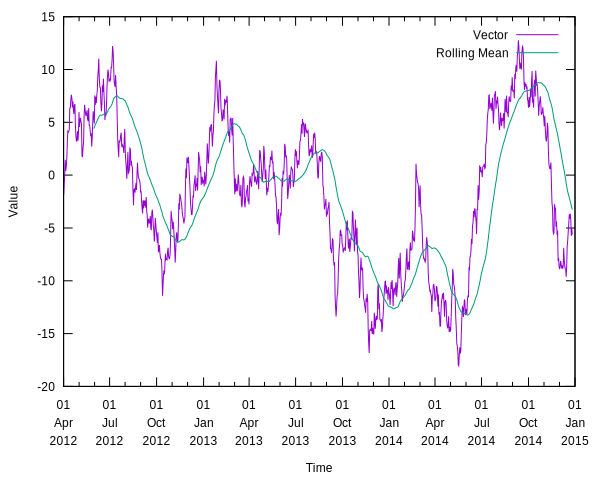

In [27]:
index  = Daru::DateTimeIndex.date_range(:start => '2012-4-2', :periods => 1000)
vector = Daru::Vector.new(1000.times.map {rng.call}, index: index)
vector = vector.cumsum
rolling_mean = vector.rolling_mean 60

GnuplotRB::Plot.new(
  [vector      , with: 'lines', title: 'Vector'], 
  [rolling_mean, with: 'lines', title: 'Rolling Mean'],
  xlabel: 'Time', ylabel: 'Value'
)

## Arel-like syntax

**Web devs will feel right at home!**

**Fast and intuitive syntax for retreiving data with boolean indexing.**

### The 'where' clause

In [28]:
df = Daru::DataFrame.new({
  a: [1,2,3,4,5,6]*100,
  b: ['a','b','c','d','e','f']*100,
  c: [11,22,33,44,55,66]*100
}, index: (1..600).to_a.shuffle)
df

,a,b,c
377,1,a,11
296,2,b,22
101,3,c,33
198,4,d,44
293,5,e,55
553,6,f,66
489,1,a,11
171,2,b,22
421,3,c,33
351,4,d,44


**Compares with a bunch of scalar quantities and returns a DataFrame wherever they return *true***

In [29]:
df.where(df[:a].eq(2).or(df[:c].eq(55)))

,a,b,c
296,2,b,22
293,5,e,55
171,2,b,22
259,5,e,55
494,2,b,22
268,5,e,55
408,2,b,22
25,5,e,55
347,2,b,22
509,5,e,55
